In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons

In [46]:
zero_one_colourmap = ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 7

# Generate Data

In [ ]:
np.random.seed(800)

In [21]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

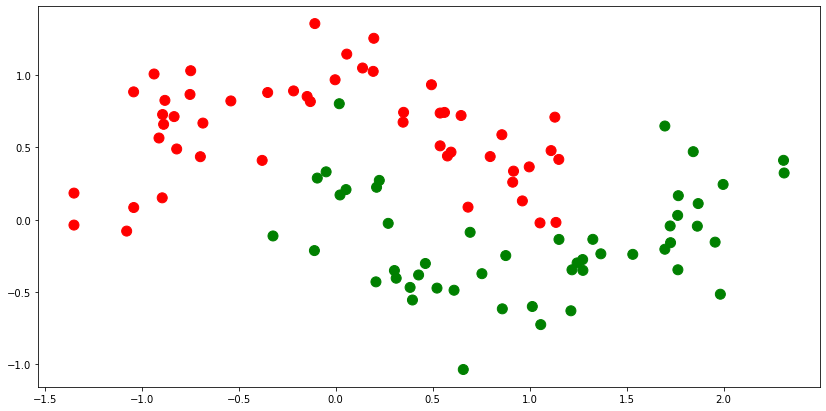

In [22]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Overfit Model

In [24]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=4000, verbose=0)

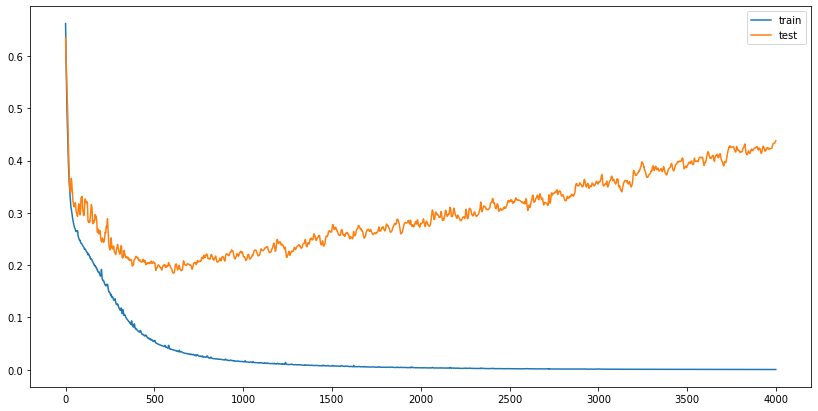

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

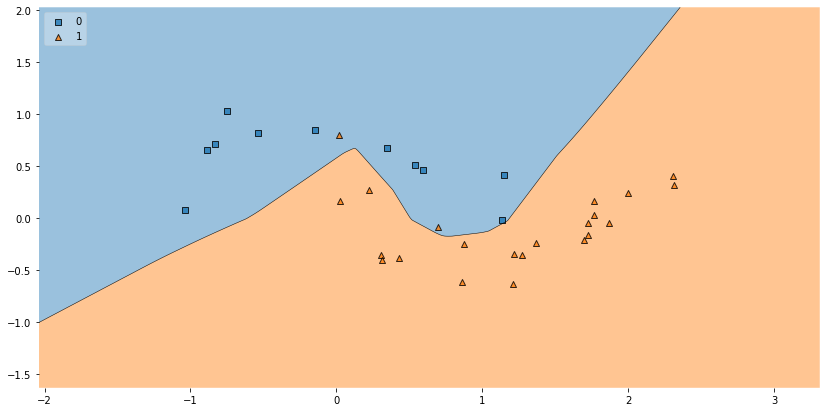

In [47]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [29]:
weights = model.get_weights()

In [36]:
np.max(weights[0])

0.7837742

In [37]:
np.max(weights[1])

0.89702576

# Regularized Model

In [38]:
reg_model = Sequential()
reg_model.add(Dense(500, input_dim=2, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [39]:
reg_history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=4000, verbose=0)

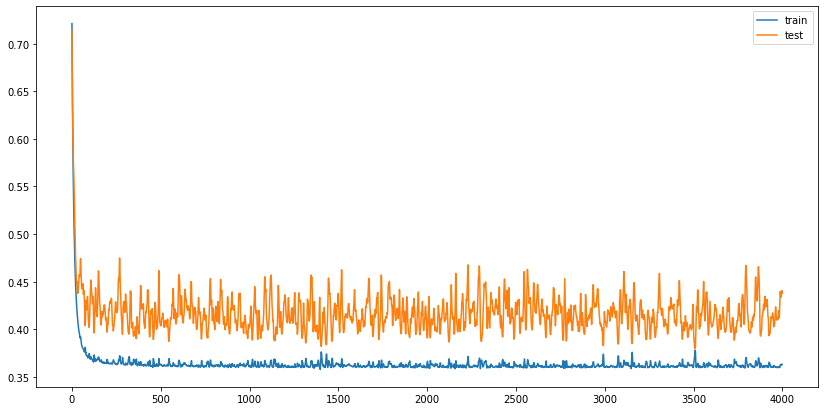

In [40]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()

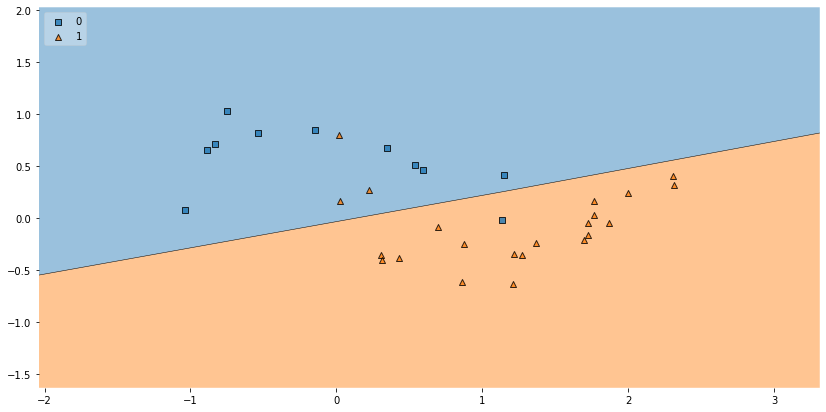

In [48]:
plot_decision_regions(X_test, y_test.ravel(), clf = reg_model, legend=2)
plt.show()

In [42]:
reg_weights = reg_model.get_weights()

In [43]:
np.max(reg_weights[0])

0.16865884

In [44]:
np.max(reg_weights[1])

0.18994257